In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

## Preprocessed Dataset ##

In [3]:
df = pd.read_csv(r"C:\Users\roger\Downloads\Capstone1_cleaned_dataset.csv")

In [4]:
print(df.isnull().sum())

Unnamed: 0                          0
Age                                 0
BMI                                 0
Sex                                 0
Height                              0
Weight                              0
Length_of_Stay                      0
Alvarado_Score                      0
Paedriatic_Appendicitis_Score       0
Appendix_on_US                      0
Appendix_Diameter                   0
Migratory_Pain                      0
Lower_Right_Abd_Pain                0
Contralateral_Rebound_Tenderness    0
Coughing_Pain                       0
Nausea                              0
Loss_of_Appetite                    0
Body_Temperature                    0
WBC_Count                           0
Neutrophil_Percentage               0
Segmented_Neutrophils               0
Neutrophilia                        0
RBC_Count                           0
Hemoglobin                          0
RDW                                 0
Thrombocyte_Count                   0
Ketones_in_U

## Renaming Target Column ##

In [6]:
df = df.rename(columns={'Diagnosis':'Label'})
print(df.dtypes)

Unnamed: 0                            int64
Age                                 float64
BMI                                 float64
Sex                                  object
Height                              float64
Weight                              float64
Length_of_Stay                      float64
Alvarado_Score                      float64
Paedriatic_Appendicitis_Score       float64
Appendix_on_US                       object
Appendix_Diameter                   float64
Migratory_Pain                       object
Lower_Right_Abd_Pain                 object
Contralateral_Rebound_Tenderness     object
Coughing_Pain                        object
Nausea                               object
Loss_of_Appetite                     object
Body_Temperature                    float64
WBC_Count                           float64
Neutrophil_Percentage               float64
Segmented_Neutrophils               float64
Neutrophilia                         object
RBC_Count                       

## Understanding Data ##

Label
appendicitis       326
no appendicitis    286
Name: count, dtype: int64

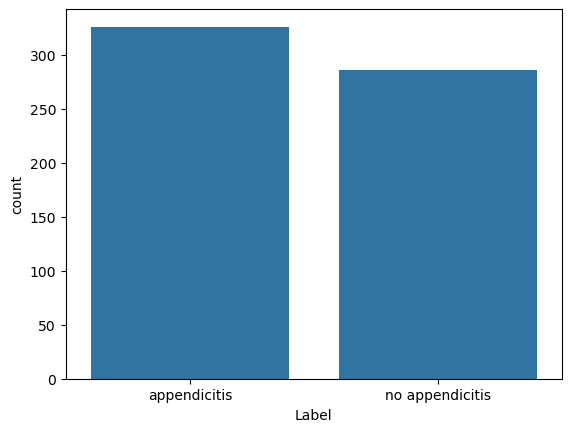

In [8]:
sns.countplot(x="Label", data=df) #M - malignant   B - benign
df['Label'].value_counts()

## Separating Label from Dataframe ##

In [10]:
y = df["Label"].values

## Separating Independent Variable from Dataframe ##

In [12]:
X = df.drop(labels = ["Label"], axis=1)

## Encoding Categorical Data ##

In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M=1 and B=0

## Standardization ##

In [16]:
from sklearn.preprocessing import StandardScaler
X_numerical = X.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)

## Importing PCA ##

In [18]:
from sklearn.decomposition import PCA

## PCA Implementation ##

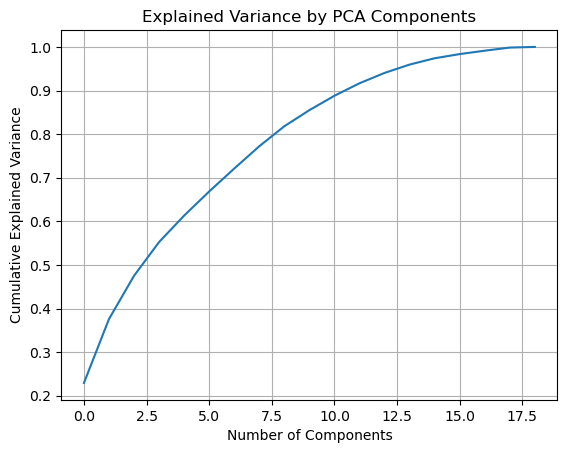

In [20]:
pca_test = PCA(n_components=19)
pca_test.fit(X_scaled)

# Step 4: Plot cumulative explained variance
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()

In [21]:
from sklearn.decomposition import PCA

n_PCA_components = 5
pca = PCA(n_components=n_PCA_components)

# Use standardized numeric data only
PrincipalComponents = pca.fit_transform(X_scaled)

# Optionally convert to DataFrame
PrincipalComponents_df = pd.DataFrame(PrincipalComponents, columns=[f'PC{i+1}' for i in range(n_PCA_components)])
PrincipalComponents_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-1.806937,-1.427128,0.710998,1.443135,-0.131909
1,-1.789529,-0.131931,2.029503,-2.629167,1.061301
2,-2.055685,0.530215,2.417396,-0.310852,0.559640
3,-1.527673,-1.667340,1.486383,-0.800417,0.212806
4,-0.196938,-1.767022,1.837256,-0.124218,0.866452


In [22]:
print(PrincipalComponents_df)

          PC1       PC2       PC3       PC4       PC5
0   -1.806937 -1.427128  0.710998  1.443135 -0.131909
1   -1.789529 -0.131931  2.029503 -2.629167  1.061301
2   -2.055685  0.530215  2.417396 -0.310852  0.559640
3   -1.527673 -1.667340  1.486383 -0.800417  0.212806
4   -0.196938 -1.767022  1.837256 -0.124218  0.866452
..        ...       ...       ...       ...       ...
607  0.550258  3.806861 -0.763510 -0.373286 -1.347693
608  1.558381  3.321888 -1.498145 -2.186241 -0.135653
609 -0.122079  0.735518 -1.794885 -1.132854  0.803048
610  4.313021  1.066004 -1.424510  0.603357  1.349642
611 -0.640861 -0.590908 -2.845654 -0.765959  0.645744

[612 rows x 5 columns]


In [23]:
print(pca.explained_variance_ratio_)

[0.22944882 0.14656656 0.09923019 0.07732949 0.06064866]


In [24]:
PrincipalComponents_df.to_excel('principal_components_result.xlsx', index=False)

print("DataFrame 'PrincipalComponents_df' has been saved to 'principal_components_result.xlsx'")

DataFrame 'PrincipalComponents_df' has been saved to 'principal_components_result.xlsx'


## PCA Summary Report ##

Using Principal Component Analysis (PCA) is to reduce the number of features in the dataset and keep the important information. After checking the explained variance plot, we chose 5 principal components. These components capture most of the variation in the data.

PCA helps through:
Making the data easier to work with
Reducing duplicate (overlapping) information between features
Preparing the dataset for better model performance
The new set of components will be used in the next step for building prediction models.